In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error


In [6]:
import pandas as pd

# Load the dataset
data = pd.read_csv('C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv')

# Convert the 'Date' column to datetime format with day-first format (DD/MM/YYYY)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Set the Date column as the index
data.set_index('Date', inplace=True)

# Check the first few rows to verify
print(data.head())

ValueError: unconverted data remains when parsing with format "%Y-%d-%m": "3", at position 12. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [7]:
# Inspect the first few rows of the 'Date' column to identify the date format
print(data['Date'].head(20))
# Convert the 'Date' column to datetime format with a specific format
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', errors='coerce')

# Check for any rows where conversion failed
print(data[data['Date'].isna()])
# Inspect rows where the conversion failed
print(data[data['Date'].isna()])
# Set the Date column as the index
data.set_index('Date', inplace=True)


0     2018-09-01
1     2018-09-02
2     2018-09-03
3     2018-09-04
4     2018-09-05
5     2018-09-06
6     2018-09-07
7     2018-09-08
8     2018-09-09
9     2018-09-10
10    2018-09-11
11    2018-09-12
12    2018-09-13
13    2018-09-14
14    2018-09-15
15    2018-09-16
16    2018-09-17
17    2018-09-18
18    2018-09-19
19    2018-09-20
Name: Date, dtype: object
   Date  Temperature (Fahrenheit) MAX   AVG  MIN  Precipitation (in)
0   NaT                            81  64.0   48                   0
1   NaT                            81  65.3   48                   0
2   NaT                            72  63.0   52                   0
3   NaT                            82  59.9   39                   0
4   NaT                            86  65.7   48                   0
5   NaT                            86  73.8   64                   0
6   NaT                            73  51.6    0                   0
7   NaT                            72  56.3   46                   0
8   NaT      

In [8]:
# Convert the 'Date' column to datetime format without specifying the format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Check for any rows where conversion failed
print(data[data['Date'].isna()])
# Set the Date column as the index
data.set_index('Date', inplace=True)


KeyError: 'Date'

In [9]:
print(data.columns)

Index(['Temperature (Fahrenheit) MAX', 'AVG', 'MIN', 'Precipitation (in)'], dtype='object')


In [11]:
import pandas as pd

# Try reading the CSV file with header row specified
data = pd.read_csv('C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv', header=0)  # 0 indicates that the first row is the header
print(data.columns)  # Check if 'Date' appears in the column names


Index(['Date', 'Temperature (Fahrenheit) MAX', 'AVG', 'MIN',
       'Precipitation (in)'],
      dtype='object')


In [12]:
# Show first few lines of the CSV to inspect how it is being read
with open('C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv', 'r') as file:
    print(file.readlines()[:10])  # Print the first 10 lines

['ï»¿Date,Temperature (Fahrenheit) MAX,AVG,MIN,Precipitation (in)\n', '01/09/2018,81,64,48,0\n', '02/09/2018,81,65.3,48,0\n', '03/09/2018,72,63,52,0\n', '04/09/2018,82,59.9,39,0\n', '05/09/2018,86,65.7,48,0\n', '06/09/2018,86,73.8,64,0\n', '07/09/2018,73,51.6,0,0\n', '08/09/2018,72,56.3,46,0\n', '09/09/2018,64,49.4,37,0\n']


In [15]:
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # Convert to datetime format
data.set_index('Date', inplace=True)
print(data.head())  # View the first few rows of the data

KeyError: 'Date'

In [16]:
print(data.columns)


Index(['Temperature (Fahrenheit) MAX', 'AVG', 'MIN', 'Precipitation (in)'], dtype='object')


In [17]:
import pandas as pd

# Try reading the CSV file with header row specified
data = pd.read_csv('C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv', header=0)  # 0 indicates that the first row is the header
print(data.columns)  # Check if 'Date' appears in the column names

Index(['Date', 'Temperature (Fahrenheit) MAX', 'AVG', 'MIN',
       'Precipitation (in)'],
      dtype='object')


In [18]:
print(data.columns)


Index(['Date', 'Temperature (Fahrenheit) MAX', 'AVG', 'MIN',
       'Precipitation (in)'],
      dtype='object')


In [19]:
data.set_index('Date', inplace=True)

In [20]:
print(data.head())

            Temperature (Fahrenheit) MAX   AVG  MIN  Precipitation (in)
Date                                                                   
01/09/2018                            81  64.0   48                   0
02/09/2018                            81  65.3   48                   0
03/09/2018                            72  63.0   52                   0
04/09/2018                            82  59.9   39                   0
05/09/2018                            86  65.7   48                   0


In [21]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the temperature (or any other column you're forecasting)
result = adfuller(data['Temperature (Fahrenheit) MAX'])

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -2.4666363306946724
p-value: 0.12380450493451145


In [22]:
# Take the first difference if the series is non-stationary
data['Temperature_diff'] = data['Temperature (Fahrenheit) MAX'].diff()
data.dropna(inplace=True)

# Check if the series is now stationary
result = adfuller(data['Temperature_diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: -4.7502644188286025
p-value: 6.764049076123275e-05


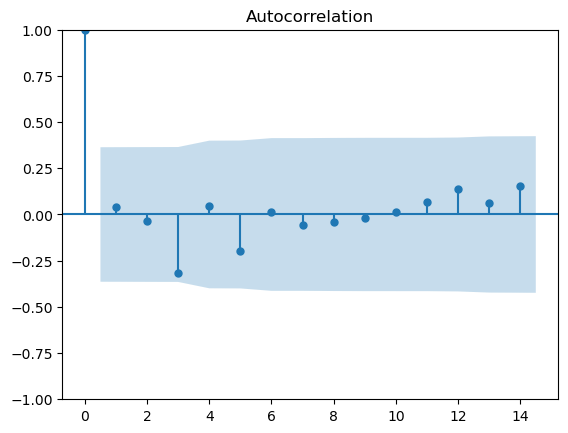

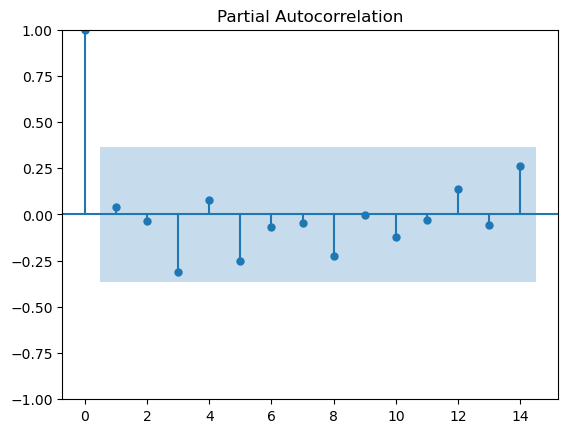

In [23]:
plot_acf(data['Temperature_diff'])
plot_pacf(data['Temperature_diff'])
plt.show()

In [24]:
# Define the ARIMA model
# For example, let's use ARIMA(1, 1, 1) based on ACF and PACF plots
model = ARIMA(data['Temperature (Fahrenheit) MAX'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:     Temperature (Fahrenheit) MAX   No. Observations:                   29
Model:                           ARIMA(1, 1, 1)   Log Likelihood                 -87.597
Date:                          Sun, 23 Mar 2025   AIC                            181.193
Time:                                  19:31:02   BIC                            185.190
Sample:                                       0   HQIC                           182.415
                                           - 29                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7175      0.255      2.811      0.005       0.217       1.218
ma.L1         -0.9998     72.371     -0.014      0.

C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


TypeError: tz must be string or tzinfo subclass, not <matplotlib.category.UnitData object at 0x0000017E9C157200>.

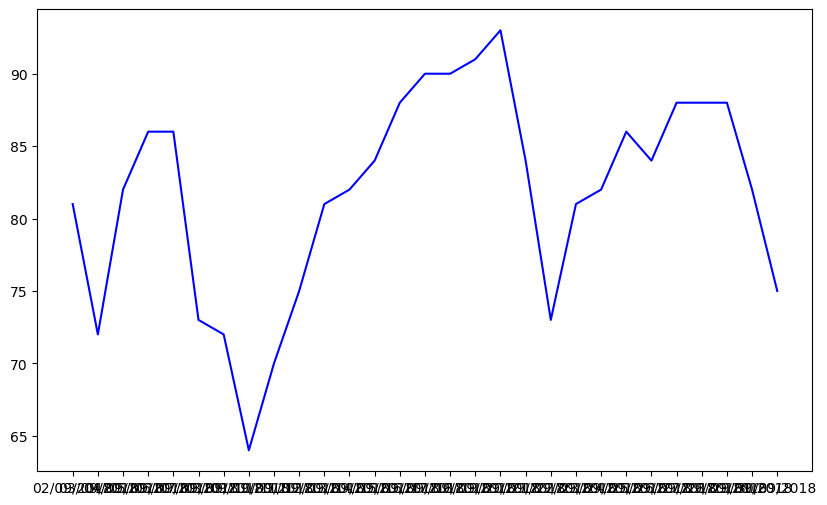

In [25]:
# Forecast the next 1000 values
forecast_steps = 1000
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Temperature (Fahrenheit) MAX'], label='Observed', color='blue')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend()
plt.show()


In [26]:
import pandas as pd

# Load the CSV file
data = pd.read_csv("C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv")

# Check column names to make sure 'Date' exists
print(data.columns)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce', format='%d/%m/%Y')

# Set it as index
data.set_index('Date', inplace=True)

# Verify the index
print(data.index)
print(data.head())  # Check if the Date column is properly formatted


Index(['Date', 'Temperature (Fahrenheit) MAX', 'AVG', 'MIN',
       'Precipitation (in)'],
      dtype='object')
DatetimeIndex(['2018-09-01', '2018-09-02', '2018-09-03', '2018-09-04',
               '2018-09-05', '2018-09-06', '2018-09-07', '2018-09-08',
               '2018-09-09', '2018-09-10', '2018-09-11', '2018-09-12',
               '2018-09-13', '2018-09-14', '2018-09-15', '2018-09-16',
               '2018-09-17', '2018-09-18', '2018-09-19', '2018-09-20',
               '2018-09-21', '2018-09-22', '2018-09-23', '2018-09-24',
               '2018-09-25', '2018-09-26', '2018-09-27', '2018-09-28',
               '2018-09-29', '2018-09-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
            Temperature (Fahrenheit) MAX   AVG  MIN  Precipitation (in)
Date                                                                   
2018-09-01                            81  64.0   48                   0
2018-09-02                            81  65.3   48                 

In [27]:
print(data.columns)

Index(['Temperature (Fahrenheit) MAX', 'AVG', 'MIN', 'Precipitation (in)'], dtype='object')


In [28]:
data['DATETIME'] = pd.to_datetime(data['DATETIME'], format='%d/%m/%Y', errors='coerce')


KeyError: 'DATETIME'

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error


In [32]:
# Assuming you have a CSV file, load the data
data = pd.read_csv('C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv')

# Convert the 'Date' column to datetime format if not already
data['DATETIME'] = pd.to_datetime(data['DATETIME'], dayfirst=True)

# Set the Date column as the index
data.set_index('DATETIME', inplace=True)

# Check the first few rows of the data
print(data.head())


            Temperature (Fahrenheit) MAX   AVG  MIN  Precipitation (in)
DATETIME                                                               
2018-09-01                            81  64.0   48                   0
2018-09-02                            81  65.3   48                   0
2018-09-03                            72  63.0   52                   0
2018-09-04                            82  59.9   39                   0
2018-09-05                            86  65.7   48                   0


In [33]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test on the temperature (or any other column you're forecasting)
result = adfuller(data['Temperature (Fahrenheit) MAX'])

print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -2.4666363306946724
p-value: 0.12380450493451145


In [34]:
# Take the first difference if the series is non-stationary
data['Temperature_diff'] = data['Temperature (Fahrenheit) MAX'].diff()
data.dropna(inplace=True)

# Check if the series is now stationary
result = adfuller(data['Temperature_diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -4.7502644188286025
p-value: 6.764049076123275e-05


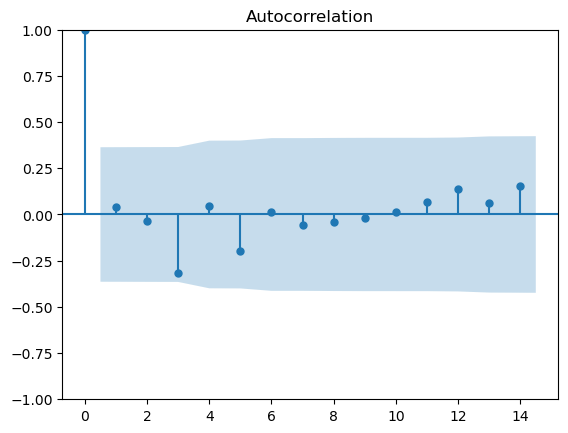

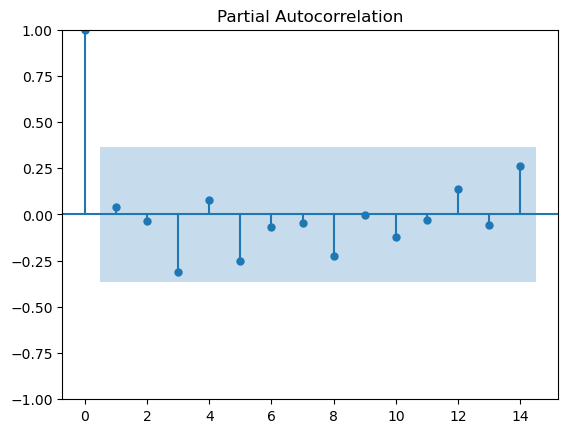

In [35]:
# Plot the ACF and PACF of the differenced data
plot_acf(data['Temperature_diff'])
plot_pacf(data['Temperature_diff'])
plt.show()


In [36]:
# Define the ARIMA model
# For example, let's use ARIMA(1, 1, 1) based on ACF and PACF plots
model = ARIMA(data['Temperature (Fahrenheit) MAX'], order=(1, 1, 1))

# Fit the model
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())


C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                    SARIMAX Results                                     
Dep. Variable:     Temperature (Fahrenheit) MAX   No. Observations:                   29
Model:                           ARIMA(1, 1, 1)   Log Likelihood                 -87.597
Date:                          Sun, 23 Mar 2025   AIC                            181.193
Time:                                  19:41:06   BIC                            185.190
Sample:                              09-02-2018   HQIC                           182.415
                                   - 09-30-2018                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7175      0.255      2.811      0.005       0.217       1.218
ma.L1         -0.9998     72.371     -0.014      0.

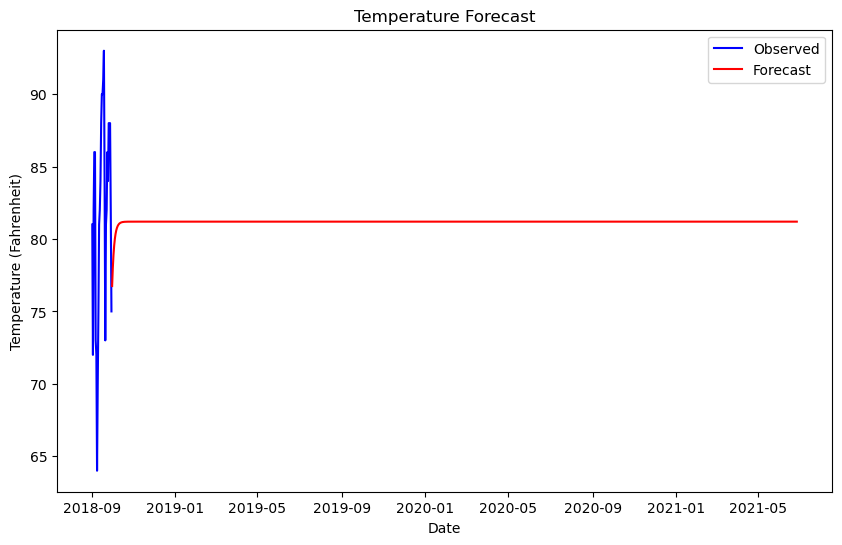

In [37]:
# Forecast the next 1000 values
forecast_steps = 1000
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(data.index, data['Temperature (Fahrenheit) MAX'], label='Observed', color='blue')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps+1, freq='D')[1:], forecast, label='Forecast', color='red')
plt.title('Temperature Forecast')
plt.xlabel('Date')
plt.ylabel('Temperature (Fahrenheit)')
plt.legend()
plt.show()


In [38]:
# If you have actual values to compare with, calculate the Mean Squared Error (MSE)
# For demonstration, let's assume you have a 'Test' set (e.g., `test_data`).

# For example, using the last part of your data as test data:
test_data = data[-100:]  # Last 100 records for testing
forecast_test = model_fit.forecast(steps=len(test_data))

# Calculate MSE
mse = mean_squared_error(test_data['Temperature (Fahrenheit) MAX'], forecast_test)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 49.55907078332511


In [39]:
# Create a DataFrame with the forecasted data
forecast_dates = pd.date_range(data.index[-1], periods=forecast_steps+1, freq='D')[1:]
forecast_df = pd.DataFrame(forecast, index=forecast_dates, columns=['Forecast'])

# Save the forecasted values to a CSV file
forecast_df.to_csv('C:\\Users\\Kirsten\\Desktop\\forecasted_weather_data.csv')


In [41]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv("C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv")
data['DATETIME'] = pd.to_datetime(data['Date'], errors='coerce', format='%d/%m/%Y')
data.set_index('DATETIME', inplace=True)

# Define columns to forecast
columns_to_forecast = ['Temperature (Fahrenheit) MAX', 'AVG', 
                       'MIN', 'Precipitation (in)']

# Create a dictionary to store forecasts
forecast_dict = {}

# Forecast each variable
for col in columns_to_forecast:
    temp_series = data[col]
    
    # Fit ARIMA model (you can adjust the order as needed)
    model = ARIMA(temp_series, order=(1,1,1))
    model_fit = model.fit()

    # Forecast the future values
    forecast_steps = 1000
    forecast = model_fit.forecast(steps=forecast_steps)

    # Store the forecasted values in the dictionary
    forecast_dict[col] = forecast

# Generate future dates for the forecast
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Create a DataFrame with forecasted values for all variables
forecast_df = pd.DataFrame(forecast_dict, index=forecast_dates)

# Save the forecasted values to a CSV file
forecast_df.to_csv('C:\\Users\\Kirsten\\Desktop\\forecasted_weather_data.csv')

# Display the forecasted DataFrame
print(forecast_df.head())


KeyError: 'Date'

In [43]:
# Check column names to see if 'Date' exists or something else
print(data.columns)

# Clean up column names if there are extra spaces
data.columns = data.columns.str.strip()

# After inspecting and confirming the correct column name, use it
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce', format='%d/%m/%Y')

# Set the index
data.set_index('DATETIME', inplace=True)


Index(['DATETIME', 'Temperature (Fahrenheit) MAX', 'AVG', 'MIN',
       'Precipitation (in)'],
      dtype='object')


In [45]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv("C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv")

# Clean column names (remove spaces if needed)
data.columns = data.columns.str.strip()

# Convert date column to datetime
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce', format='%d/%m/%Y')
data.set_index('DATETIME', inplace=True)

# Define columns to forecast
columns_to_forecast = ['Temperature (Fahrenheit) MAX', 'AVG', 'MIN', 'Precipitation (in)']

# Create a dictionary to store forecasts
forecast_dict = {}

# Forecasting parameters
forecast_steps = 1000  # Number of future days to predict

# Forecast each variable
for col in columns_to_forecast:
    temp_series = data[col].dropna()  # Drop NaN values to avoid errors
    
    # Fit ARIMA model (order can be adjusted)
    model = ARIMA(temp_series, order=(1,1,1))  # Adjust ARIMA order as needed
    model_fit = model.fit()

    # Forecast 1000 future values
    forecast = model_fit.forecast(steps=forecast_steps)

    # Store the forecasted values
    forecast_dict[col] = forecast

# Generate future dates for the forecast
forecast_dates = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq='D')[1:]

# Create a DataFrame with forecasted values for all variables
forecast_df = pd.DataFrame(forecast_dict, index=forecast_dates)

# Save the forecasted values to a CSV file
forecast_df.to_csv("C:\\Users\\Kirsten\\Desktop\\forecasted_weather_data.csv")

# Display the first few forecasted records
print(forecast_df.head())


C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Kirsten\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting M

            Temperature (Fahrenheit) MAX        AVG        MIN  \
2018-10-01                     74.706231  64.504562  58.780173   
2018-10-02                     74.709193  65.108809  57.250817   
2018-10-03                     74.709164  65.512447  57.740115   
2018-10-04                     74.709164  65.782076  57.583571   
2018-10-05                     74.709164  65.962189  57.633655   

            Precipitation (in)  
2018-10-01                 0.0  
2018-10-02                 0.0  
2018-10-03                 0.0  
2018-10-04                 0.0  
2018-10-05                 0.0  


In [48]:
print(data)

            Temperature (Fahrenheit) MAX   AVG  MIN  Precipitation (in)
DATETIME                                                               
2018-09-01                            81  64.0   48                   0
2018-09-02                            81  65.3   48                   0
2018-09-03                            72  63.0   52                   0
2018-09-04                            82  59.9   39                   0
2018-09-05                            86  65.7   48                   0
2018-09-06                            86  73.8   64                   0
2018-09-07                            73  51.6    0                   0
2018-09-08                            72  56.3   46                   0
2018-09-09                            64  49.4   37                   0
2018-09-10                            70  52.9   34                   0
2018-09-11                            75  56.9   39                   0
2018-09-12                            81  63.1   45             

In [52]:
data = pd.read_csv('C:\\Users\\Kirsten\\Desktop\\forecasted_weather_data.csv')

In [53]:
print(data)

        DATETIME  Temperature (Fahrenheit) MAX        AVG        MIN  \
0     01/09/2018                     81.000000  64.000000  48.000000   
1     02/09/2018                     81.000000  65.300000  48.000000   
2     03/09/2018                     72.000000  63.000000  52.000000   
3     04/09/2018                     82.000000  59.900000  39.000000   
4     05/09/2018                     86.000000  65.700000  48.000000   
...          ...                           ...        ...        ...   
1025  22/06/2021                     74.709164  66.324584  57.621515   
1026  23/06/2021                     74.709164  66.324584  57.621515   
1027  24/06/2021                     74.709164  66.324584  57.621515   
1028  25/06/2021                     74.709164  66.324584  57.621515   
1029  26/06/2021                     74.709164  66.324584  57.621515   

      Precipitation (in)  
0                      0  
1                      0  
2                      0  
3                      0  


In [55]:
import pandas as pd

# Load the original dataset (if you have it)
data = pd.read_csv('C:\\Users\\Kirsten\\Desktop\\Weather dataset sep 2018.csv')

# Load the forecasted dataset (from the CSV file you saved earlier)
forecast_data = pd.read_csv('C:\\Users\\Kirsten\\Desktop\\forecasted_weather_data.csv')

# Convert 'DATETIME' to datetime format for both datasets
data['DATETIME'] = pd.to_datetime(data['DATETIME'], errors='coerce', format='%d/%m/%Y')
data.set_index('DATETIME', inplace=True)

# If you saved the forecasted data with 'forecast_df', you might also need to convert its index to datetime:
forecast_data['DATETIME'] = pd.to_datetime(forecast_data['DATETIME'], errors='coerce')
forecast_data.set_index('DATETIME', inplace=True)

# Combine the original dataset with the forecasted dataset
combined_data = pd.concat([data, forecast_data])

# Print the combined dataset to verify
print(combined_data.head())  # First few rows to check
print(combined_data.tail())  # Last few rows (should show forecasted data)

            Temperature (Fahrenheit) MAX   AVG   MIN  Precipitation (in)
DATETIME                                                                
2018-09-01                          81.0  64.0  48.0                   0
2018-09-02                          81.0  65.3  48.0                   0
2018-09-03                          72.0  63.0  52.0                   0
2018-09-04                          82.0  59.9  39.0                   0
2018-09-05                          86.0  65.7  48.0                   0
          Temperature (Fahrenheit) MAX        AVG        MIN  \
DATETIME                                                       
NaT                          74.709164  66.324584  57.621515   
NaT                          74.709164  66.324584  57.621515   
NaT                          74.709164  66.324584  57.621515   
NaT                          74.709164  66.324584  57.621515   
NaT                          74.709164  66.324584  57.621515   

          Precipitation (in)  
DATETIME 

In [57]:
import pandas as pd

# Load the CSV file
file_path = "C:\\Users\\Kirsten\\Desktop\\forecasted_weather_data.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Remove duplicates
df = df.drop_duplicates()

# Drop rows with missing values
df = df.dropna()

# Save the cleaned data to a new CSV file
clean_file_path = "cleaned_data.csv"  # Change if needed
df.to_csv(clean_file_path, index=False)

print(f"Cleaned data saved to {"C:\\Users\\Kirsten\\Desktop\\cleaned_weather_data.csv"}")


Cleaned data saved to C:\Users\Kirsten\Desktop\cleaned_weather_data.csv


In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Load your dataset (assuming it's in a CSV)
df = pd.read_csv("C:\\Users\\Kirsten\\Desktop\\forecasted_weather_data.csv")

# Select only numerical columns for scaling
columns_to_scale = ["Temperature (Fahrenheit) MAX", "AVG", "MIN", "Precipitation (in)"]

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Save the normalized dataset
df.to_csv("normalized_weather_data.csv", index=False)

print("Normalization complete! ✅")


Normalization complete! ✅


In [3]:
from sklearn.model_selection import train_test_split

# Assume that the target variable is 'target_column', you can replace it with your actual target variable
X = df[columns_to_scale]  # Features
y = df['Temperature (Fahrenheit) MAX']   # Target 

# Split the data (80% training, 10% validation, 10% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Data splitting complete! ✅")


Data splitting complete! ✅


In [4]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

print("Model training complete! ✅")


Model training complete! ✅


In [5]:
from sklearn.metrics import mean_squared_error

# Predict on the validation set
y_valid_pred = rf_model.predict(X_valid)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_valid, y_valid_pred)
print(f"Validation MSE: {mse}")


Validation MSE: 1.0405012190809454e-05


In [6]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, y_valid_pred)
print(f"Validation R-squared: {r2}")


Validation R-squared: 0.9932791746852452


In [7]:
from sklearn.model_selection import GridSearchCV

# Set up the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit grid search
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 50}


In [8]:
y_test_pred = rf_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
print(f"Test Mean Squared Error: {test_mse}")


Test Mean Squared Error: 7.348787195076605e-05


In [9]:
import joblib

# Save the trained model
joblib.dump(rf_model, 'C:\\Users\\Kirsten\\weather_model.pkl')

print("Model saved! ✅")


Model saved! ✅


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data (if not already done)
X = df[["Temperature (Fahrenheit) MAX", "AVG", "MIN", "Precipitation (in)"]]  # Features
y = df['Temperature (Fahrenheit) MAX']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 8.526447132432811e-33
R-squared: 1.0


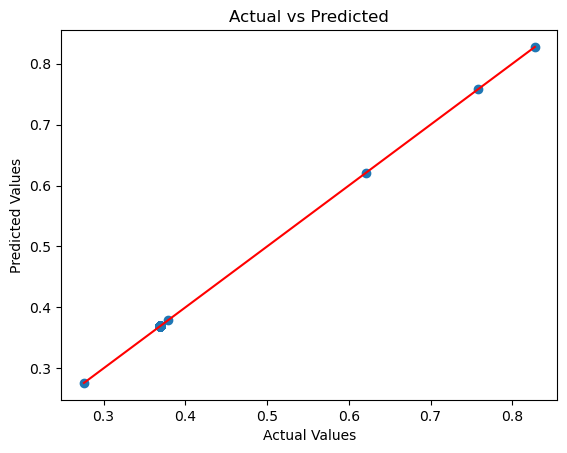

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.show()


In [17]:
import pickle

# Open the pickle file
with open('C:\\Users\\Kirsten\\weather_model.pkl', 'rb') as file:
    data = pickle.load(file)

# Now you can use the 'data' variable which contains the loaded object
print(data)
# PLEASE PUT IN YOUR OWN FILE PATHS IF YOU WOULD LIKE TO RUN THIS CODE, whichever filepath youve downloaded the datasets in. 

['Temperature (Fahrenheit) MAX' 'AVG' 'MIN' 'Precipitation (in)']
